In [5]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from astropy.io import fits

In [16]:
# Path to your .fits file
fits_file_path = '../psf_28.fits'

# Open the .fits file using Astropy
with fits.open(fits_file_path) as hdul:
    # Get the header and data from the primary HDU (Extension 0)
    header = hdul[0].header
    psf = (hdul[0].data).astype(np.float32)[0,0, ...]

# Now you can work with the header and data as needed
# For example, you can print the header and check the data shape:
print(header)
print(psf.shape)
dataset = torch.load("../../MNIST_torch/test_images.pt")
k = np.random.randint(len(dataset))
x = dataset[k].reshape(28, 28).numpy()

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    4                                                  NAXIS1  =                   28                                                  NAXIS2  =                   28                                                  NAXIS3  =                    1                                                  NAXIS4  =                    1                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   2.363824596008E-05                                                  BMIN    =   1.588911645942E-05                                                  BPA     =   5.916237258911E+01          

Data shape: (256, 256)
Image shape: (28, 28)


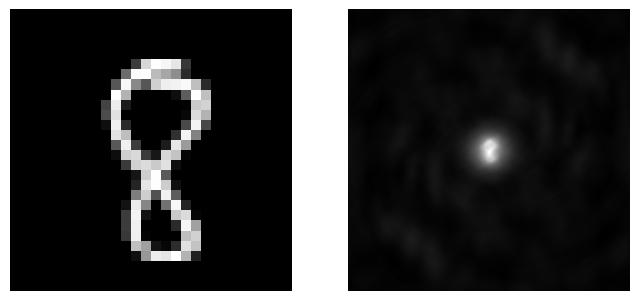

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


psf_path = "../psf_256.fits"


def open_fits_file(file_path):
    # Open the FITS file
    with fits.open(file_path) as hdul:
        # Access the primary HDU (header and data unit)
        hdu = hdul[0]

        # Extract the data from the HDU and convert it to a NumPy array
        data = np.array(hdu.data)

    return data


def pad_image_to_size(small_image, large_image):
    # Get the shape difference between the images
    shape_diff = np.subtract(large_image.shape, small_image.shape)

    # Calculate the required padding for each side
    padding = [(diff // 2, diff - (diff // 2)) for diff in shape_diff]

    # Pad the small image with zeros
    padded_image = np.pad(small_image, padding, mode='constant')

    return padded_image

# Example usage
psf = open_fits_file(psf_path).squeeze()
image_data = dataset[k].reshape(28, 28).numpy()

# Display the shape of the data array
print(f"Data shape: {psf.shape}")
print(f"Image shape: {image_data.shape}")


sampling = np.fft.fft2(psf)
visibilities = np.fft.fft2(pad_image_to_size(image_data, psf))
dirty_image = np.fft.fftshift(np.fft.ifft2(sampling * visibilities))

fig, axs = plt.subplots(1, 2, figsize = (8, 4))

for i in range(len(axs)): 
    axs[i].axis("off")
axs[0].imshow(image_data, cmap = "gray")
axs[1].imshow(np.real(dirty_image), cmap = "gray")



In [37]:
pad_image_to_size(image_data, psf).shape

(256, 256)